In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_01.csv')
print(df.head)

# Select features (PC1 and PC2) for clustering
X = df[['PC1', 'PC2']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Calculate the Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f'Silhouette Score: {sil_score:.2f}')

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming 3 clusters
    plt.scatter(
        df.loc[df['Cluster'] == cluster, 'PC1'],
        df.loc[df['Cluster'] == cluster, 'PC2'],
        label=f'Cluster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters based on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

NameError: name 'sub_ALL_centroids' is not defined

<bound method NDFrame.head of            PC1        PC2 EmotionLabel
0   -39.293036 -36.102414      SADNESS
1   -39.934963 -25.833571      SADNESS
2   -33.224083  19.367687    HAPPINESS
3    64.397546  13.487224         FEAR
4     9.311332 -40.364656      SADNESS
..         ...        ...          ...
634  13.647490   9.451895    HAPPINESS
635 -44.114816 -14.741275         LOVE
636  39.654267  10.878129         FEAR
637  17.802262 -57.899259      SADNESS
638  15.057826 -11.894406    HAPPINESS

[639 rows x 3 columns]>
Standard deviation for SADNESS (PC1, PC2): [[27.99685358]
 [        nan]]


/var/folders/d7/jdzmp4454ygckpsf1cd42p680000gn/T/ipykernel_35218/2974769027.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
/Users/pongpnag8848/Desktop/DeepEmotion/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


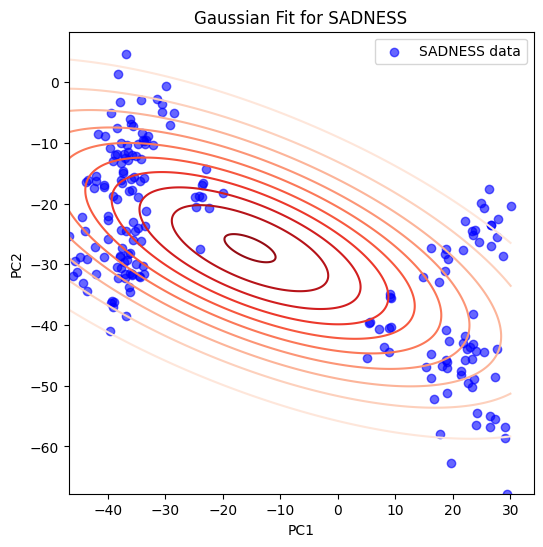

/var/folders/d7/jdzmp4454ygckpsf1cd42p680000gn/T/ipykernel_35218/2974769027.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
/Users/pongpnag8848/Desktop/DeepEmotion/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Standard deviation for HAPPINESS (PC1, PC2): [[20.7347458]
 [       nan]]


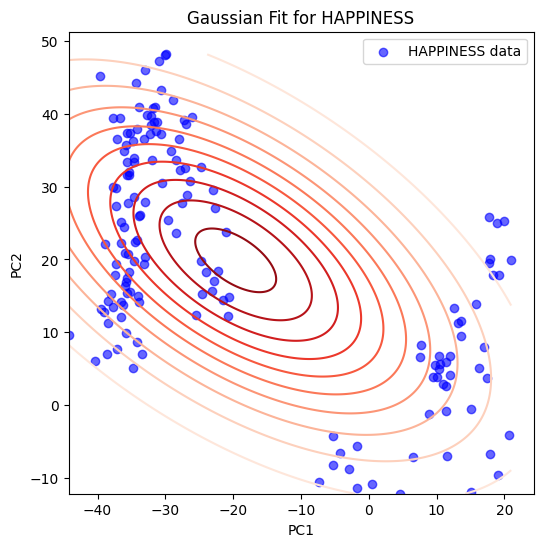

/var/folders/d7/jdzmp4454ygckpsf1cd42p680000gn/T/ipykernel_35218/2974769027.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
/Users/pongpnag8848/Desktop/DeepEmotion/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Standard deviation for FEAR (PC1, PC2): [[15.53519167]
 [        nan]]


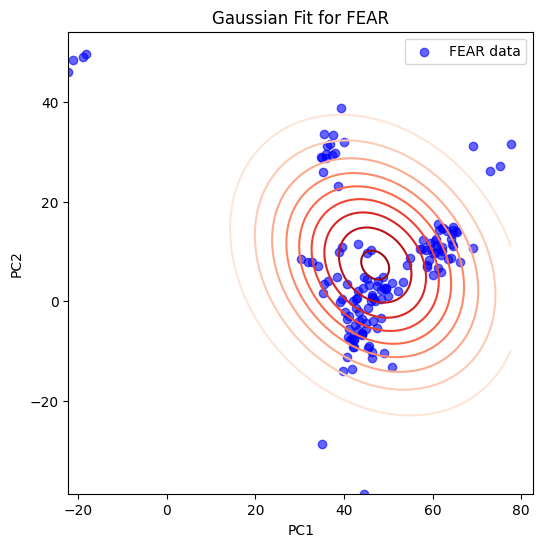

/var/folders/d7/jdzmp4454ygckpsf1cd42p680000gn/T/ipykernel_35218/2974769027.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
/Users/pongpnag8848/Desktop/DeepEmotion/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Standard deviation for ANGER (PC1, PC2): [[12.84305465]
 [        nan]]


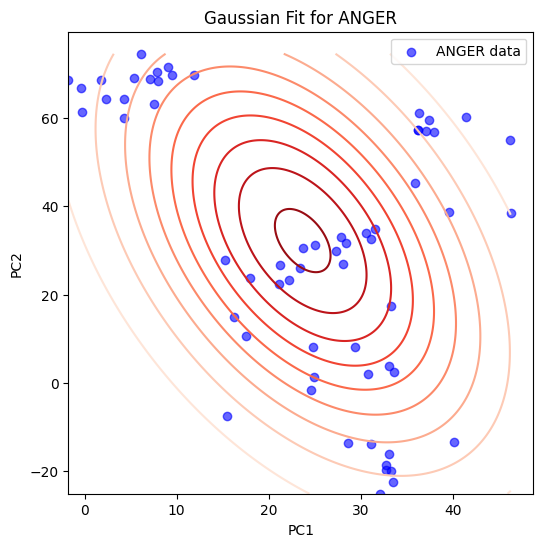

/var/folders/d7/jdzmp4454ygckpsf1cd42p680000gn/T/ipykernel_35218/2974769027.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
/Users/pongpnag8848/Desktop/DeepEmotion/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Standard deviation for LOVE (PC1, PC2): [[27.84554572]
 [        nan]]


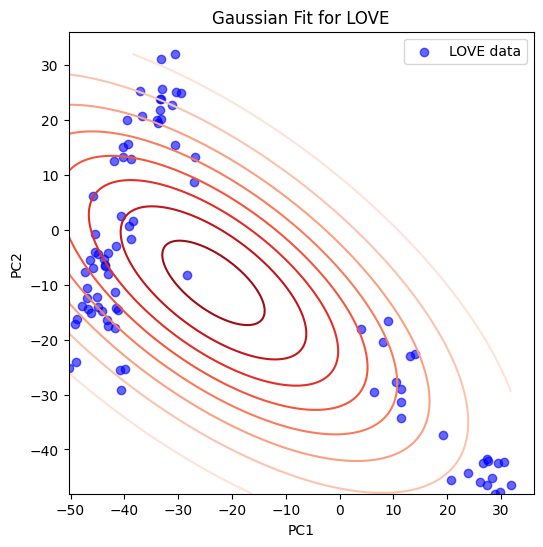

In [8]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_01.csv')
print(df.head)

# Function to fit a Gaussian distribution for each emotion
def fit_gaussian_and_print_std(df):
    emotions = df['EmotionLabel'].unique()
    
    for emotion in emotions:
        emotion_data = df[df['EmotionLabel'] == emotion][['PC1', 'PC2']]
        
        # Fit Gaussian Mixture Model (GMM) with 1 component (1 Gaussian)
        gmm = GaussianMixture(n_components=1)
        gmm.fit(emotion_data)
        
        # Extract the standard deviation from the covariance matrix
        std_dev = np.sqrt(np.diagonal(gmm.covariances_))  # sqrt of diagonal elements of covariance matrix
        print(f"Standard deviation for {emotion} (PC1, PC2): {std_dev}")

        # Optional: Plot the data and the fitted Gaussian
        plt.figure(figsize=(6, 6))
        plt.scatter(emotion_data['PC1'], emotion_data['PC2'], label=f"{emotion} data", color='blue', alpha=0.6)
        
        # Create a grid for plotting the Gaussian distribution
        x, y = np.mgrid[emotion_data['PC1'].min():emotion_data['PC1'].max():0.1, 
                        emotion_data['PC2'].min():emotion_data['PC2'].max():0.1]
        pos = np.dstack((x, y))
        z = np.exp(gmm.score_samples(pos.reshape(-1, 2))).reshape(x.shape)

        plt.contour(x, y, z, levels=10, cmap='Reds')
        plt.title(f"Gaussian Fit for {emotion}")
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        plt.show()

# Fit Gaussian and print the standard deviation for each emotion
fit_gaussian_and_print_std(df)

In [9]:
import pandas as pd
import numpy as np

# Return The values of PC1_mean and PC2_mean are the average values of the principal components PC1 and PC2, 
# respectively, for a given emotion (EmotionLabel) in a subject's data file.

# Example list of subject CSV file paths (replace these with the actual file paths)
subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]

# Initialize a dictionary to hold emotion data for each emotion
emotion_data = {emotion: [] for emotion in ['SADNESS', 'HAPPINESS', 'FEAR', 'ANGER', 'LOVE']}  # Initialize with empty lists for each emotion

# Loop through each subject and extract data
for subject_path in subject_paths:
    df = pd.read_csv(subject_path)
    
    # Extract mean or any specific calculation from the subject's data for each emotion
    # Assuming the columns 'PC1', 'PC2', and 'EmotionLabel' exist in each subject's data
    subject_emotions = df.groupby('EmotionLabel')[['PC1', 'PC2']].mean()  # Using mean for simplicity, you can choose other aggregations
    
    # Merge the emotion data for each subject into the emotion_data dictionary
    for emotion in emotion_data.keys():
        if emotion in subject_emotions.index:
            # Append the (PC1, PC2) tuple for this emotion and subject
            emotion_data[emotion].append((subject_emotions.loc[emotion, 'PC1'], subject_emotions.loc[emotion, 'PC2']))
        else:
            # If the emotion is not present, append NaNs or any placeholder
            emotion_data[emotion].append((np.nan, np.nan))

# Create a DataFrame where each row corresponds to an emotion, and each column corresponds to a subject
emotion_df = pd.DataFrame(emotion_data)

# Display the result
print(emotion_df)


                                       SADNESS  \
0   (-15.244444404821337, -27.354961124354542)   
1       (7.443023232416853, 40.15053635623208)   
2      (-19.42512578851114, 3.628760275054439)   
3      (5.697287609290272, -16.06348444267542)   
4    (-15.557771137086014, -7.108604717128669)   
5    (26.628501716883914, -18.228410039907633)   
6    (-16.244671797002628, 13.529242834479053)   
7     (-21.98462443488504, 3.4592857882763903)   
8      (49.77968134294238, 24.378513884401823)   
9    (-26.547967442744618, -5.930314902765856)   
10   (-26.547967442744618, -5.930314902765856)   
11    (-11.252106675810476, 6.440067669455007)   
12   (-16.81790764054569, -2.2721311669311195)   
13   (-23.616360453772007, 19.237804506734022)   
14    (-13.823668044405595, 8.603381846041287)   
15     (19.894595922872803, 17.74977992099175)   
16   (-17.601053622389653, 15.935680643530143)   
17  (-16.07463624158818, 0.047334796242801395)   
18    (15.64148581286171, -10.810461226936994)   


In [10]:
import pandas as pd
import numpy as np

# Example list of subject CSV file paths (replace these with the actual file paths)
subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]

# Initialize a dictionary to hold variance data for each emotion
emotion_variance = {emotion: [] for emotion in ['SADNESS', 'HAPPINESS', 'FEAR', 'ANGER', 'LOVE']}  # Update with all possible emotions

# Loop through each subject and compute variance for each emotion
for subject_path in subject_paths:
    df = pd.read_csv(subject_path)

    # Group by 'EmotionLabel' and compute variance for PC1 and PC2
    subject_variances = df.groupby('EmotionLabel')[['PC1', 'PC2']].var()  # Variance of PC1 and PC2 for each emotion

    # Merge the variance data for each subject into the emotion_variance dictionary
    for emotion in emotion_variance.keys():
        if emotion in subject_variances.index:
            # Compute the overall variance (sum of PC1 and PC2 variances)
            variance_sum = subject_variances.loc[emotion, 'PC1'] + subject_variances.loc[emotion, 'PC2']
            emotion_variance[emotion].append(variance_sum)
        else:
            # If the emotion is not present, append NaN
            emotion_variance[emotion].append(np.nan)

# Create a DataFrame where each row corresponds to an emotion, and each column corresponds to a subject
variance_df = pd.DataFrame(emotion_variance).T  # Transpose for proper alignment
variance_df.columns = [f'Subject_{i}' for i in range(1, 21)]  # Set subject names as column headers

# Display the result
print(variance_df)

# Save the DataFrame to a CSV file (optional)
variance_df.to_csv('/Users/pongpnag8848/Desktop/DeepEmotion/variance_table.csv', index=True)


             Subject_1    Subject_2   Subject_3   Subject_4   Subject_5  \
SADNESS    1001.606357  1475.584657  448.700599  277.643842  469.803770   
HAPPINESS   664.506306  1674.213723  398.586487  373.292226  582.273610   
FEAR        450.518996   743.373396  221.015703  180.780938   93.724848   
ANGER      1109.105300  1354.618484  375.035872  280.873095  464.221927   
LOVE       1297.177891  1377.586360  555.874853  184.610415  370.473711   

            Subject_6   Subject_7    Subject_8    Subject_9   Subject_10  \
SADNESS    473.776980  666.322624   856.305942  3523.259187  1510.248039   
HAPPINESS  237.552263  436.414346  1127.016973  1683.997895  1882.045047   
FEAR       306.713910  182.715703   454.934404  2073.644446   859.848040   
ANGER      372.955289  521.238307   617.466458  2962.495410  1517.123963   
LOVE       459.681615  398.439297   559.725323  1160.571907  1276.101495   

            Subject_11  Subject_12   Subject_13   Subject_14  Subject_15  \
SADNESS    1510.

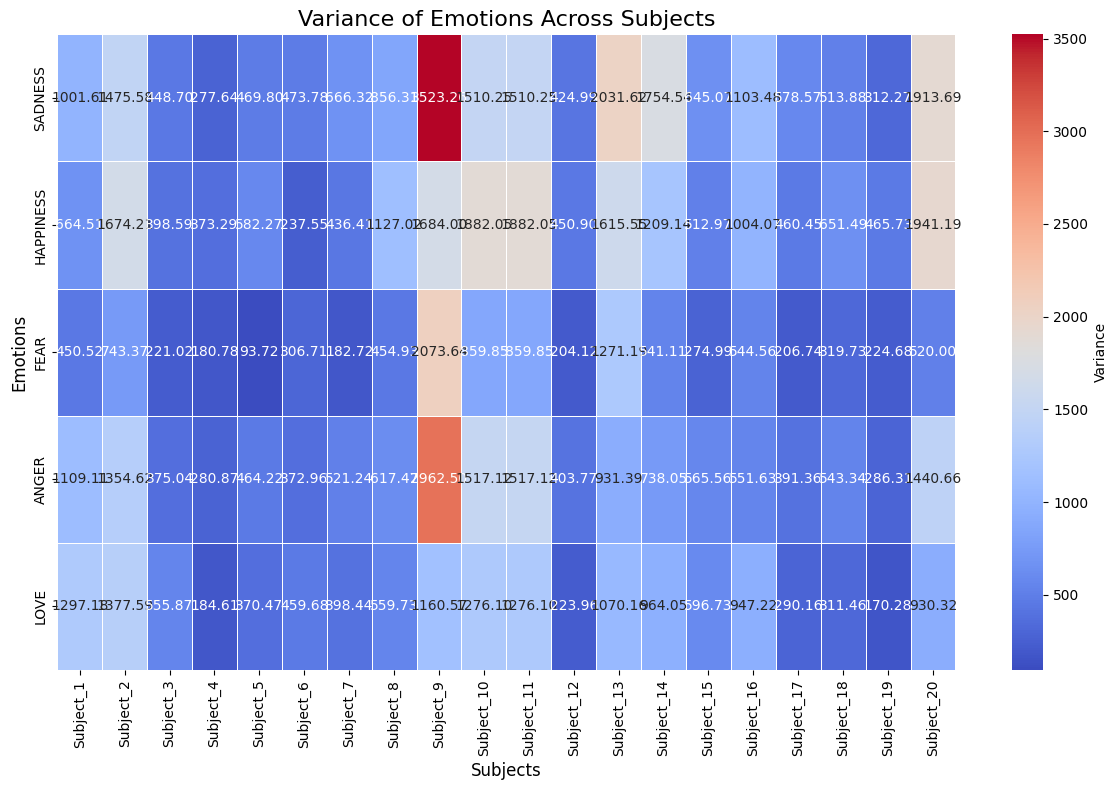

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example list of subject CSV file paths (replace these with the actual file paths)
subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]

# Initialize a dictionary to hold variance data for each emotion
emotion_variance = {emotion: [] for emotion in ['SADNESS', 'HAPPINESS', 'FEAR', 'ANGER', 'LOVE']}  # Update with all possible emotions

# Loop through each subject and compute variance for each emotion
for subject_path in subject_paths:
    df = pd.read_csv(subject_path)

    # Group by 'EmotionLabel' and compute variance for PC1 and PC2
    subject_variances = df.groupby('EmotionLabel')[['PC1', 'PC2']].var()  # Variance of PC1 and PC2 for each emotion

    # Merge the variance data for each subject into the emotion_variance dictionary
    for emotion in emotion_variance.keys():
        if emotion in subject_variances.index:
            # Compute the overall variance (sum of PC1 and PC2 variances)
            variance_sum = subject_variances.loc[emotion, 'PC1'] + subject_variances.loc[emotion, 'PC2']
            emotion_variance[emotion].append(variance_sum)
        else:
            # If the emotion is not present, append NaN
            emotion_variance[emotion].append(np.nan)

# Create a DataFrame where each row corresponds to an emotion, and each column corresponds to a subject
variance_df = pd.DataFrame(emotion_variance).T  # Transpose for proper alignment
variance_df.columns = [f'Subject_{i}' for i in range(1, 21)]  # Set subject names as column headers

# Save the variance table to a CSV file (optional)
variance_df.to_csv('/Users/pongpnag8848/Desktop/DeepEmotion/variance_table.csv', index=True)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    variance_df,
    annot=True,          # Display variance values in cells
    fmt=".2f",           # Format numbers to 2 decimal places
    cmap="coolwarm",     # Color scheme
    linewidths=0.5,      # Add gridlines
    cbar_kws={"label": "Variance"}  # Label for the color bar
)

# Add labels and title
plt.title("Variance of Emotions Across Subjects", fontsize=16)
plt.xlabel("Subjects", fontsize=12)
plt.ylabel("Emotions", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


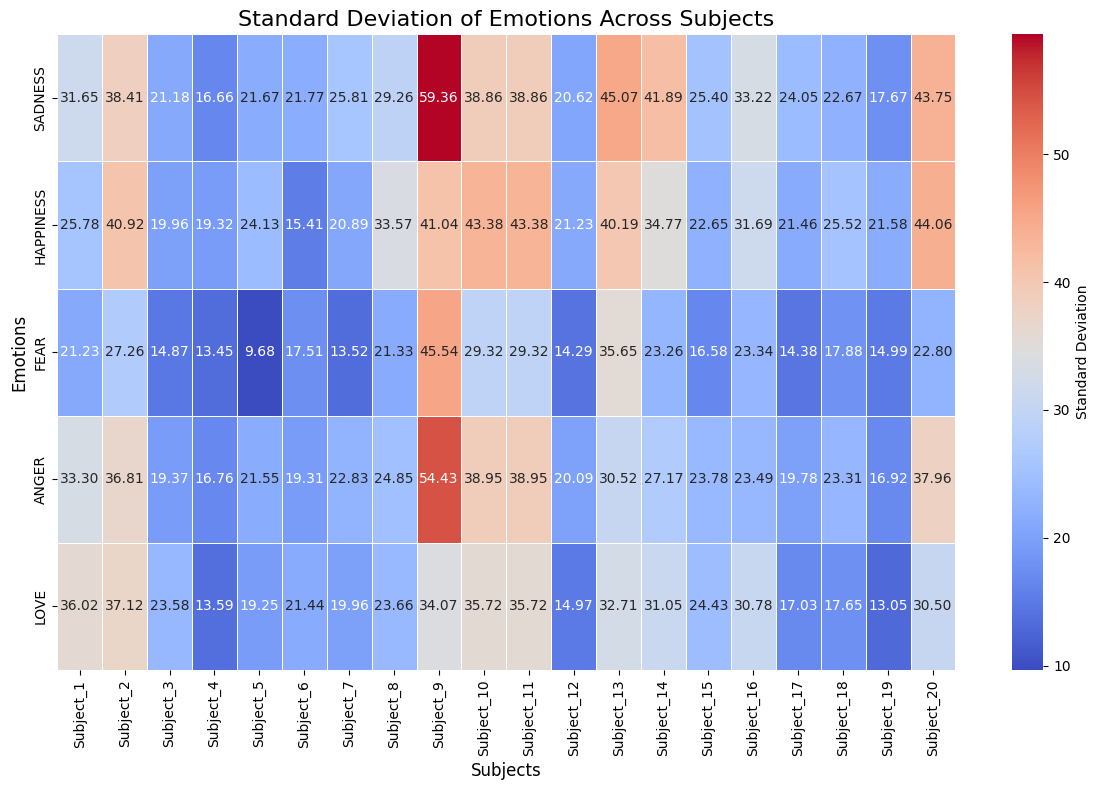

In [2]:
# Generate a table of standard deviation based on chat

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example list of subject CSV file paths (replace these with the actual file paths)
subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]

# Initialize a dictionary to hold standard deviation data for each emotion
emotion_std_dev = {emotion: [] for emotion in ['SADNESS', 'HAPPINESS', 'FEAR', 'ANGER', 'LOVE']}  # Update with all possible emotions

# Loop through each subject and compute standard deviation for each emotion
for subject_path in subject_paths:
    df = pd.read_csv(subject_path)

    # Group by 'EmotionLabel' and compute standard deviation for PC1 and PC2
    subject_std_devs = df.groupby('EmotionLabel')[['PC1', 'PC2']].std()  # Standard deviation of PC1 and PC2 for each emotion

    # Merge the standard deviation data for each subject into the emotion_std_dev dictionary
    for emotion in emotion_std_dev.keys():
        if emotion in subject_std_devs.index:
            # Compute the overall standard deviation (root of sum of variances for PC1 and PC2)
            std_dev_sum = np.sqrt(subject_std_devs.loc[emotion, 'PC1']**2 + subject_std_devs.loc[emotion, 'PC2']**2)
            emotion_std_dev[emotion].append(std_dev_sum)
        else:
            # If the emotion is not present, append NaN
            emotion_std_dev[emotion].append(np.nan)

# Create a DataFrame where each row corresponds to an emotion, and each column corresponds to a subject
std_dev_df = pd.DataFrame(emotion_std_dev).T  # Transpose for proper alignment
std_dev_df.columns = [f'Subject_{i}' for i in range(1, 21)]  # Set subject names as column headers

# Save the standard deviation table to a CSV file (optional)
std_dev_df.to_csv('/Users/pongpnag8848/Desktop/DeepEmotion/std_dev_table.csv', index=True)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    std_dev_df,
    annot=True,          # Display standard deviation values in cells
    fmt=".2f",           # Format numbers to 2 decimal places
    cmap="coolwarm",     # Color scheme
    linewidths=0.5,      # Add gridlines
    cbar_kws={"label": "Standard Deviation"}  # Label for the color bar
)

# Add labels and title
plt.title("Standard Deviation of Emotions Across Subjects", fontsize=16)
plt.xlabel("Subjects", fontsize=12)
plt.ylabel("Emotions", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The above code might be wrong, as subject 9 should be so different like in red color. 
Here is my approach:
1. visualize subject 9 separately first --> tried to write a code only for subject 9, but it there is an error.
2. try to write new function based on my own understanding

In [2]:
import csv
def file_to_list(file_name: str) -> list:
    # Initialize an empty list to store the rows
    data = []

    # Open the CSV file
    with open(file_name, mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Skip the header (optional)
        next(csv_reader)
        
        # Read each row and append to the list
        for row in csv_reader:
            data.append(row)
    return data

print(file_to_list('PCA/hidden/sub_09.csv'))

[['-95.90988894661868', '-31.965043234816783', 'FEAR'], ['9.668152507765875', '5.63241797198387', 'ANGER'], ['-85.72136369483309', '-8.772745359328603', 'FEAR'], ['46.59263016672095', '35.08684589925471', 'LOVE'], ['97.0379213213491', '-7.947994675670891', 'SADNESS'], ['96.17745422881484', '38.7280627247486', 'SADNESS'], ['99.58876456232771', '45.98185921954166', 'SADNESS'], ['104.0757124119732', '38.515988107851825', 'SADNESS'], ['-158.35232840836474', '37.314381432231045', 'FEAR'], ['-18.281060616215086', '-92.25741085273646', 'HAPPINESS'], ['-89.7259937219633', '-2.3737831425767695', 'FEAR'], ['-30.538690909570967', '-77.57932019406704', 'HAPPINESS'], ['-168.45283923093027', '48.73177904998157', 'FEAR'], ['-112.30772350317845', '11.552928070029779', 'FEAR'], ['19.508316076856197', '-13.180357999986853', 'HAPPINESS'], ['16.045368820744727', '-66.65712262681421', 'HAPPINESS'], ['52.217277985703795', '32.83337524097638', 'LOVE'], ['86.93435743109576', '74.21366680211847', 'LOVE'], ['-1

In [3]:
# function to calculation a dictionary of emotion : vairance 
def group_data_by_emotion(data: list) -> dict:
    dict_so_far = {}
    for row in data:
        if row[2] not in dict_so_far:
            dict_so_far[row[2]] = [[float(row[0])], [float(row[1])]]
        else:
            dict_so_far[row[2]][0].append(float(row[0]))
            dict_so_far[row[2]][1].append(float(row[1]))
    return dict_so_far

sub_9_data = file_to_list('PCA/hidden/sub_09.csv')
processed_9 = group_data_by_emotion(sub_9_data)
print(processed_9)

{'FEAR': [[-95.90988894661868, -85.72136369483309, -158.35232840836474, -89.7259937219633, -168.45283923093027, -112.30772350317845, -170.73096485524215, -164.6114620028194, -44.43279447398655, -65.21834328259433, -67.94476811488522, -173.0881494828854, -122.88393932134204, -37.48227118352753, -85.3843851626273, -98.52006162317203, -119.80530073340168, -98.0437643028771, -151.97150557181746, -161.59673933725034, -60.05152833573793, -163.0827465265137, -170.63504607941226, -167.2750273105083, -103.02490274619248, -162.0412721501139, -100.65576378313833, -111.37914575381538, -146.56967924358142, -111.62562554853892, -119.90648197364057, -85.25501622756201, -156.7438520783549, -98.00843731232426, -167.33449757820077, -81.1844427764962, -134.49387686787279, -169.19959849233626, -135.4065476264292, -80.96986235105364, -104.2387890844779, -159.21417550408185, -167.05649815874324, -166.21394409751713, -128.18153920012128, -164.24641128250911, -80.33525488795462, -147.4583410795822, -120.21739

In [4]:
import statistics

def emotion_variance(data: dict) -> dict:
    new_dict = {}
    all_emotions = ['SADNESS', 'HAPPINESS', 'FEAR', 'ANGER', 'LOVE']
    for emotion in all_emotions:
        pc1_var = statistics.variance(data[emotion][0])
        pc2_var = statistics.variance(data[emotion][1])
        total_var = pc1_var + pc2_var
        new_dict[emotion] = pc1_var + pc2_var
    return new_dict

sub_9_data = file_to_list('PCA/hidden/sub_09.csv')
processed_9 = group_data_by_emotion(sub_9_data)
print(emotion_variance(processed_9))


{'SADNESS': 3523.2591868897034, 'HAPPINESS': 1683.9978950147038, 'FEAR': 2073.644446099822, 'ANGER': 2962.495410139307, 'LOVE': 1160.571906851734}


In [5]:
# generate a dictionary of all of the variance value for each subject and emotion 

subject_variance_hidden = {}
all_files = [f'PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]
all_subjects = [f'SUB_{i}' for i in range(1,21)]

for i in range(0,20):
    name = all_files[i]
    data_1 = file_to_list(name)
    data_2 = group_data_by_emotion(data_1)
    data_3 = emotion_variance(data_2)
    subject_variance_hidden[all_subjects[i]] = data_3

print(subject_variance_hidden)


{'SUB_1': {'SADNESS': 1001.6063565006136, 'HAPPINESS': 664.5063056514165, 'FEAR': 450.5189958143976, 'ANGER': 1109.105299774824, 'LOVE': 1297.1778907319576}, 'SUB_2': {'SADNESS': 1475.584657352325, 'HAPPINESS': 1674.213722558582, 'FEAR': 743.3733957004985, 'ANGER': 1354.618484061894, 'LOVE': 1377.586359551351}, 'SUB_3': {'SADNESS': 448.70059873972525, 'HAPPINESS': 398.58648685117953, 'FEAR': 221.01570267070295, 'ANGER': 375.03587237382703, 'LOVE': 555.8748529268482}, 'SUB_4': {'SADNESS': 277.64384152234715, 'HAPPINESS': 373.2922259235493, 'FEAR': 180.78093766484722, 'ANGER': 280.87309534636177, 'LOVE': 184.61041468623714}, 'SUB_5': {'SADNESS': 469.8037698445711, 'HAPPINESS': 582.2736104655955, 'FEAR': 93.72484798300022, 'ANGER': 464.22192665216977, 'LOVE': 370.47371075864737}, 'SUB_6': {'SADNESS': 473.7769804729186, 'HAPPINESS': 237.55226295567613, 'FEAR': 306.713909554016, 'ANGER': 372.95528929604023, 'LOVE': 459.68161475572435}, 'SUB_7': {'SADNESS': 666.3226235337098, 'HAPPINESS': 43

In [6]:
subject_variance_raw = {}
all_files = [f'PCA/raw/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]
all_subjects = [f'SUB_{i}' for i in range(1,21)]

for i in range(0,20):
    name = all_files[i]
    data_1 = file_to_list(name)
    data_2 = group_data_by_emotion(data_1)
    data_3 = emotion_variance(data_2)
    subject_variance_raw[all_subjects[i]] = data_3

print(subject_variance_raw)

{'SUB_1': {'SADNESS': 441348067.6438044, 'HAPPINESS': 459861727.0691332, 'FEAR': 240505922.39003646, 'ANGER': 281504798.9209564, 'LOVE': 377970192.6255859}, 'SUB_2': {'SADNESS': 2265322091.7908974, 'HAPPINESS': 2563366451.5256834, 'FEAR': 695512068.3301018, 'ANGER': 884519495.4730916, 'LOVE': 2335783882.4445376}, 'SUB_3': {'SADNESS': 607371103.4766312, 'HAPPINESS': 600370580.2922523, 'FEAR': 305613459.0445435, 'ANGER': 606702204.725913, 'LOVE': 425236593.7914581}, 'SUB_4': {'SADNESS': 839042333.5283794, 'HAPPINESS': 1471796890.2428184, 'FEAR': 897976701.9396684, 'ANGER': 1722212152.237146, 'LOVE': 422338628.44084287}, 'SUB_5': {'SADNESS': 1265908549.8115416, 'HAPPINESS': 1834277544.327313, 'FEAR': 1125806475.631648, 'ANGER': 2214127355.622945, 'LOVE': 1463284684.5576632}, 'SUB_6': {'SADNESS': 2486664979.124382, 'HAPPINESS': 2128573155.8968387, 'FEAR': 1551695894.609706, 'ANGER': 1755307170.4550533, 'LOVE': 2628266494.1317215}, 'SUB_7': {'SADNESS': 2595733900.507357, 'HAPPINESS': 247657

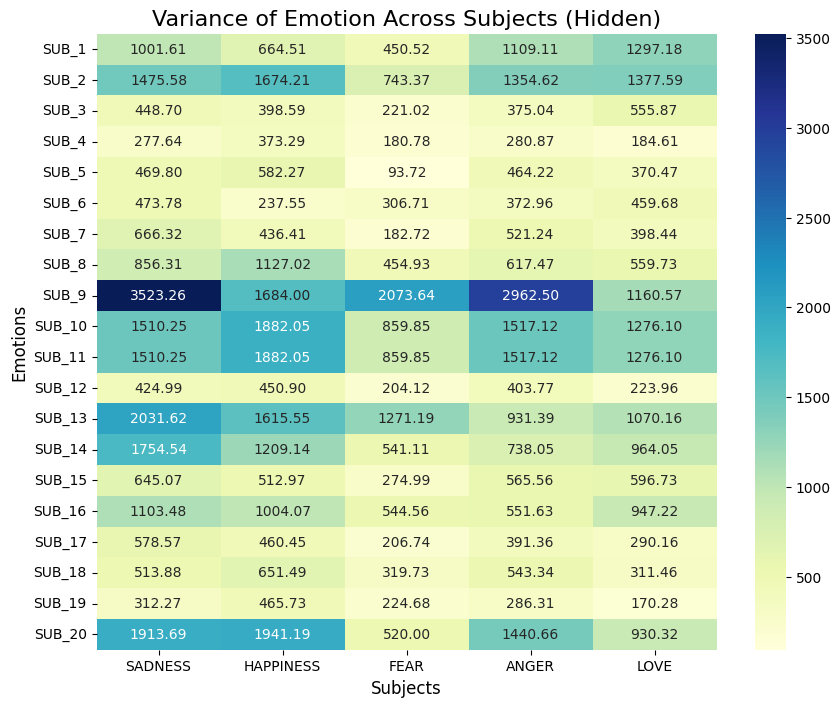

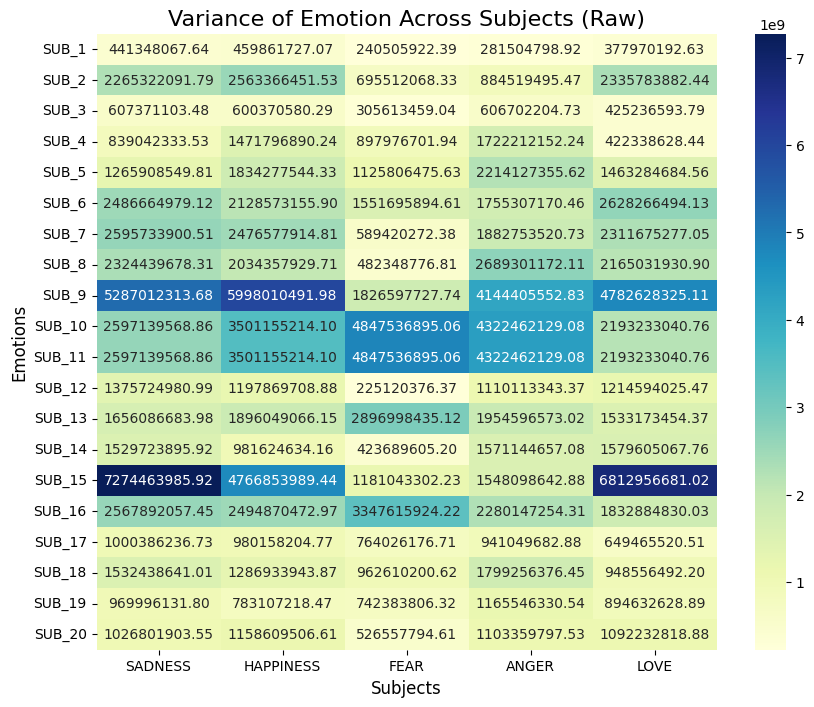

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_emotion_data_with_color(data, header: str):
    # Convert the input data into a pandas DataFrame
    df = pd.DataFrame(data).T  # Transpose to have subjects as columns and emotions as rows
    
    # Create the heatmap using seaborn
    plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
    sns.heatmap(df, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, annot_kws={"size": 10})
    plt.title(header, fontsize=16)
    plt.xlabel('Subjects', fontsize=12)
    plt.ylabel('Emotions', fontsize=12)
    
    # Show the plot
    plt.show()

visualize_emotion_data_with_color(subject_variance_hidden, 'Variance of Emotion Across Subjects (Hidden)')
visualize_emotion_data_with_color(subject_variance_raw, 'Variance of Emotion Across Subjects (Raw)')

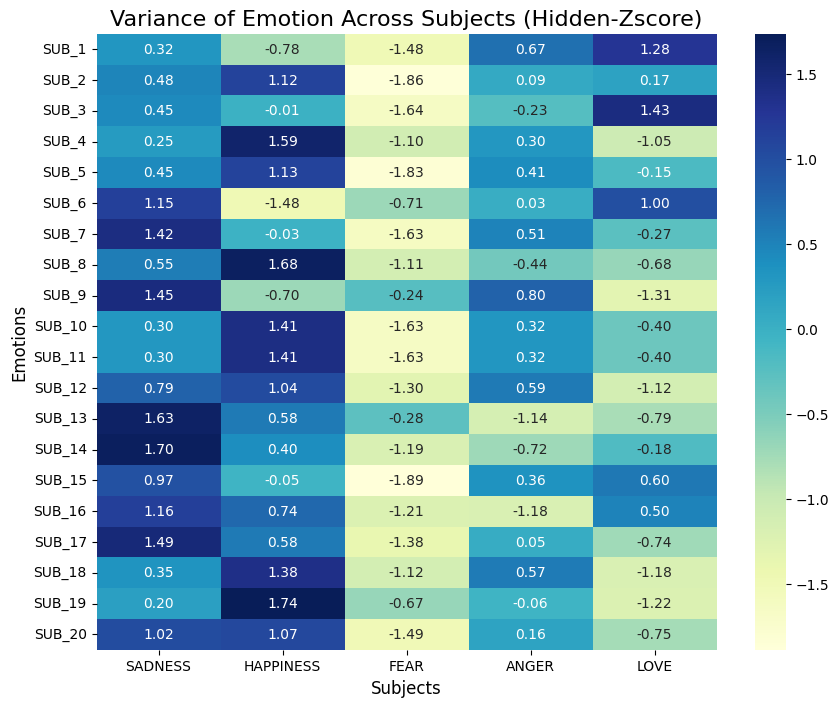

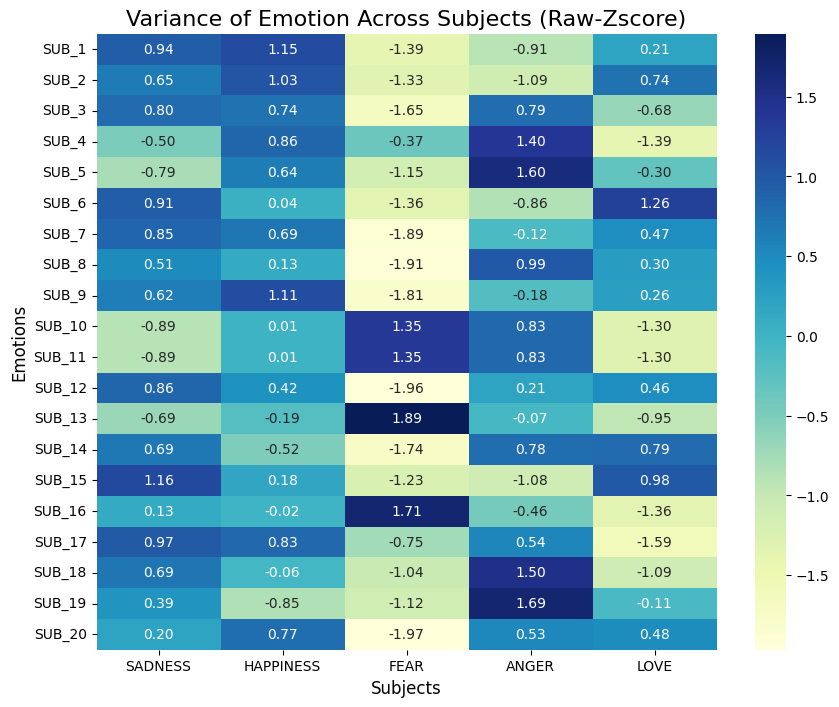

In [9]:
# Normalize the data using z-score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def normalize_data(data, method='zscore'):
    # Convert data into pandas DataFrame
    df = pd.DataFrame(data)  # Transpose to have subjects as columns and emotions as rows
    
    # Z-score normalization (standardization)
    if method == 'zscore':
        scaler = StandardScaler()
        df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    
    return df_normalized

normalized_hidden = normalize_data(subject_variance_hidden)
normalized_raw = normalize_data(subject_variance_raw)

visualize_emotion_data_with_color(normalized_hidden, 'Variance of Emotion Across Subjects (Hidden-Zscore)')
visualize_emotion_data_with_color(normalized_raw, 'Variance of Emotion Across Subjects (Raw-Zscore)')

### **1. Variance ± CI Table → Emotional Stability & Consistency**
- **Low variance** → The subject experiences the emotion in a **consistent and stable** way.
- **High variance** → The subject’s emotional representation is **more variable and inconsistent** (more fluctuations in how they express that emotion).
- **Wide CI** → The emotional variability itself is uncertain, meaning their emotional response is unpredictable.

#### 🔹 **Use Case:** To compare **who has stable vs. fluctuating emotions** across subjects.

### **2. Mean ± CI Table → Emotional Representation & Differences Between Subjects**
- **Mean value** → The **general emotional representation** of a subject (where they tend to be in PCA space for that emotion).
- **Smaller CI** → The subject has a **reliable** emotional representation.
- **Larger CI** → The subject’s emotional experience fluctuates more, making it **less predictable**.
- **Comparing means** → Shows **how different subjects represent the same emotion** (e.g., one subject may experience sadness in a way that is very different from another).

#### 🔹 **Use Case:** To see **how different subjects experience emotions and how consistently they do so**.

In [3]:
## **Python Function for Variance ± CI Table**
"""
Below is a Python function that processes multiple subject CSV files, normalizes PCA values using z-score, and generates a table where:
- **Columns** represent different subjects.
- **Rows** represent different emotions.
"""

import pandas as pd
import numpy as np
from scipy.stats import zscore, t

# VARIANCE +- CI
def compute_variance_ci(file_paths):
    data = {}
    
    for file_path in file_paths:
        subject_name = file_path.split('/')[-1].split('.')[0]  # Extract subject name from file name
        df = pd.read_csv(file_path)
        df[['PC1', 'PC2']] = df[['PC1', 'PC2']].apply(zscore)  # Normalize PC values using z-score
        
        grouped = df.groupby('EmotionLabel')[['PC1', 'PC2']].agg(['var', 'count'])
        ci_values = {}
        
        for emotion, stats in grouped.iterrows():
            variance = stats[('PC1', 'var')]  # Using PC1 for variance
            n = stats[('PC1', 'count')]
            if n > 1:
                ci = t.ppf(0.975, n-1) * (variance / np.sqrt(n))
            else:
                ci = np.nan  # CI can't be computed with a single sample
            ci_values[emotion] = f"{variance:.2f} ± {ci:.2f}"
        
        data[subject_name] = ci_values
    
    return pd.DataFrame(data).fillna('N/A')

# MEAN +- CI

def compute_mean_ci(file_paths):
    data = {}
    
    for file_path in file_paths:
        subject_name = file_path.split('/')[-1].split('.')[0]  # Extract subject name from file name
        df = pd.read_csv(file_path)
        df[['PC1', 'PC2']] = df[['PC1', 'PC2']].apply(zscore)  # Normalize PC values using z-score
        
        grouped = df.groupby('EmotionLabel')[['PC1', 'PC2']].agg(['mean', 'std', 'count'])
        ci_values = {}
        
        for emotion, stats in grouped.iterrows():
            mean = stats[('PC1', 'mean')]  # Using PC1 for mean
            std = stats[('PC1', 'std')]
            n = stats[('PC1', 'count')]
            if n > 1:
                ci = t.ppf(0.975, n-1) * (std / np.sqrt(n))
            else:
                ci = np.nan  # CI can't be computed with a single sample
            ci_values[emotion] = f"{mean:.2f} ± {ci:.2f}"
        
        data[subject_name] = ci_values
    
    return pd.DataFrame(data).fillna('N/A')

In [4]:
file_paths_hidden = subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/hidden/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]
file_paths_raw = subject_paths = [f'/Users/pongpnag8848/Desktop/DeepEmotion/PCA/raw/sub_{str(i).zfill(2)}.csv' for i in range(1, 21)]

In [5]:
var_ci_hid = compute_variance_ci(file_paths_hidden)
print(var_ci_hid)

                sub_01       sub_02       sub_03       sub_04       sub_05  \
ANGER      0.13 ± 0.03  0.30 ± 0.08  0.29 ± 0.07  0.41 ± 0.11  0.51 ± 0.13   
FEAR       0.19 ± 0.03  0.19 ± 0.03  0.22 ± 0.04  0.09 ± 0.02  0.07 ± 0.01   
HAPPINESS  0.33 ± 0.05  0.50 ± 0.08  0.39 ± 0.06  0.52 ± 0.08  0.76 ± 0.12   
LOVE       0.61 ± 0.13  0.37 ± 0.08  0.17 ± 0.04  0.23 ± 0.05  0.46 ± 0.10   
SADNESS    0.61 ± 0.09  0.38 ± 0.05  0.33 ± 0.05  0.48 ± 0.07  0.62 ± 0.09   

                sub_06       sub_07       sub_08       sub_09       sub_10  \
ANGER      0.11 ± 0.03  0.41 ± 0.10  0.21 ± 0.05  0.34 ± 0.09  0.43 ± 0.11   
FEAR       0.15 ± 0.03  0.12 ± 0.02  0.17 ± 0.03  0.23 ± 0.04  0.18 ± 0.03   
HAPPINESS  0.15 ± 0.02  0.38 ± 0.06  0.69 ± 0.11  0.19 ± 0.03  0.52 ± 0.08   
LOVE       0.33 ± 0.07  0.42 ± 0.09  0.13 ± 0.03  0.12 ± 0.03  0.22 ± 0.05   
SADNESS    0.34 ± 0.05  0.76 ± 0.11  0.42 ± 0.06  0.50 ± 0.07  0.44 ± 0.06   

                sub_11       sub_12       sub_13       sub_14 

In [6]:
var_ci_raw = compute_variance_ci(file_paths_raw)
print(var_ci_raw)

                sub_01       sub_02       sub_03       sub_04       sub_05  \
ANGER      0.22 ± 0.06  0.31 ± 0.08  0.80 ± 0.20  1.00 ± 0.25  1.81 ± 0.46   
FEAR       0.35 ± 0.06  0.24 ± 0.04  0.25 ± 0.04  0.33 ± 0.06  0.76 ± 0.13   
HAPPINESS  0.95 ± 0.15  0.98 ± 0.15  0.87 ± 0.14  1.05 ± 0.16  1.25 ± 0.20   
LOVE       0.78 ± 0.17  0.86 ± 0.18  0.63 ± 0.13  0.21 ± 0.04  0.72 ± 0.16   
SADNESS    0.93 ± 0.13  0.84 ± 0.12  0.87 ± 0.12  0.61 ± 0.09  0.79 ± 0.11   

                sub_06       sub_07       sub_08       sub_09       sub_10  \
ANGER      0.76 ± 0.19  0.61 ± 0.16  1.23 ± 0.31  0.57 ± 0.15  0.81 ± 0.21   
FEAR       0.70 ± 0.12  0.16 ± 0.03  0.11 ± 0.02  0.19 ± 0.03  1.50 ± 0.25   
HAPPINESS  0.90 ± 0.14  0.80 ± 0.13  0.92 ± 0.15  0.91 ± 0.14  1.04 ± 0.16   
LOVE       1.38 ± 0.30  0.76 ± 0.16  0.98 ± 0.21  0.76 ± 0.16  0.70 ± 0.15   
SADNESS    1.19 ± 0.17  0.87 ± 0.12  1.06 ± 0.15  0.84 ± 0.12  0.82 ± 0.12   

                sub_11       sub_12       sub_13       sub_14 

In [7]:
mean_ci_hid = compute_mean_ci(file_paths_hidden)
print(mean_ci_hid)

                 sub_01        sub_02        sub_03        sub_04  \
ANGER       0.66 ± 0.09  -0.32 ± 0.14   0.69 ± 0.14  -0.36 ± 0.16   
FEAR        1.31 ± 0.07  -1.37 ± 0.07   1.36 ± 0.08  -1.39 ± 0.05   
HAPPINESS  -0.55 ± 0.09   0.74 ± 0.11  -0.14 ± 0.10   0.78 ± 0.11   
LOVE       -0.65 ± 0.17   0.78 ± 0.13  -0.62 ± 0.09   0.48 ± 0.10   
SADNESS    -0.42 ± 0.11   0.14 ± 0.09  -0.81 ± 0.08   0.27 ± 0.10   

                 sub_05        sub_06        sub_07        sub_08  \
ANGER       0.84 ± 0.18  -0.53 ± 0.08   0.83 ± 0.16   0.93 ± 0.12   
FEAR        1.02 ± 0.04  -1.39 ± 0.06   1.18 ± 0.06   1.24 ± 0.07   
HAPPINESS  -0.02 ± 0.14  -0.07 ± 0.06  -0.28 ± 0.10  -0.34 ± 0.13   
LOVE       -0.87 ± 0.14   0.81 ± 0.12  -0.68 ± 0.14  -0.75 ± 0.08   
SADNESS    -0.60 ± 0.11   0.87 ± 0.08  -0.59 ± 0.12  -0.58 ± 0.09   

                 sub_09        sub_10        sub_11        sub_12  \
ANGER       0.11 ± 0.15   0.72 ± 0.17   0.72 ± 0.17   0.51 ± 0.17   
FEAR       -1.54 ± 0.08   1.33 ±

In [8]:
mean_ci_raw = compute_mean_ci(file_paths_raw)
print(mean_ci_raw)

                 sub_01        sub_02        sub_03        sub_04  \
ANGER       0.69 ± 0.12  -0.78 ± 0.14   0.45 ± 0.23   0.25 ± 0.25   
FEAR        0.83 ± 0.10  -0.83 ± 0.08   0.95 ± 0.08   1.08 ± 0.10   
HAPPINESS  -0.31 ± 0.15   0.28 ± 0.16  -0.37 ± 0.15  -0.39 ± 0.16   
LOVE       -0.44 ± 0.19   0.59 ± 0.20  -0.45 ± 0.17  -0.54 ± 0.10   
SADNESS    -0.37 ± 0.14   0.36 ± 0.13  -0.33 ± 0.13  -0.31 ± 0.11   

                 sub_05        sub_06        sub_07        sub_08  \
ANGER       0.27 ± 0.34   0.06 ± 0.22   0.35 ± 0.20  -0.18 ± 0.28   
FEAR       -0.21 ± 0.15   0.07 ± 0.14   1.02 ± 0.07  -0.74 ± 0.06   
HAPPINESS   0.17 ± 0.18  -0.00 ± 0.15  -0.46 ± 0.14   0.42 ± 0.15   
LOVE       -0.01 ± 0.18  -0.28 ± 0.25  -0.49 ± 0.19   0.25 ± 0.21   
SADNESS    -0.07 ± 0.13   0.06 ± 0.15  -0.27 ± 0.13   0.15 ± 0.15   

                 sub_09        sub_10        sub_11        sub_12  \
ANGER      -0.53 ± 0.19   0.11 ± 0.23   0.11 ± 0.23  -0.34 ± 0.23   
FEAR       -0.95 ± 0.07  -0.07 ±

In [9]:
# Visualization with matplotlib
import matplotlib.pyplot as plt

def create_table_image(data, title="Emotion Data Table"):
    # Create a DataFrame from the given data
    df = pd.DataFrame(data)

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(22, 6))  # Adjust size as needed
    ax.axis('off')  # Remove axes

    # Plot the table
    table = ax.table(cellText=df.values,
                    colLabels=df.columns,
                    rowLabels=df.index,
                    loc='center',
                    cellLoc='center',
                    colLoc='center',
                    bbox=[0, 0, 1, 1])

    # Style the table: adjusting font size and cell widths
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#f2f2f2')  # Light gray for header
        else:
            cell.set_fontsize(10)
        # Adjust column width
        max_len = max(len(str(cell.get_text())) for i, cell in table.get_celld().items() if i[1] == j)
        table.auto_set_column_width([j])

    # Title
    plt.title(title, fontsize=14, weight='bold')

    # Save the image
    plt.tight_layout()
    plt.savefig("emotion_data_table.png", bbox_inches='tight')
    plt.show()


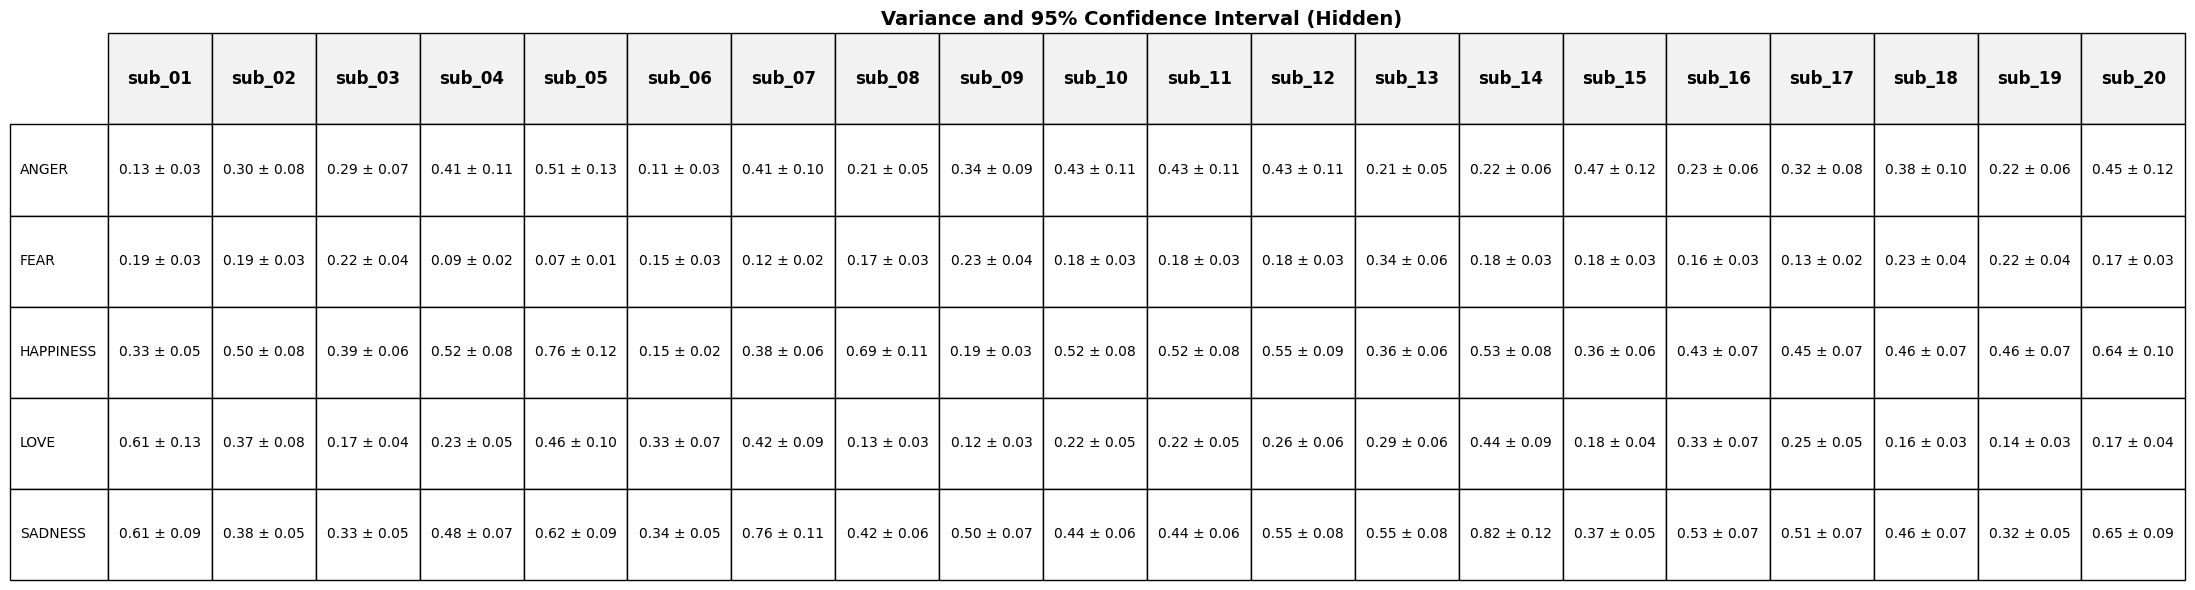

In [10]:
create_table_image(var_ci_hid, title="Variance and 95% Confidence Interval (Hidden)")

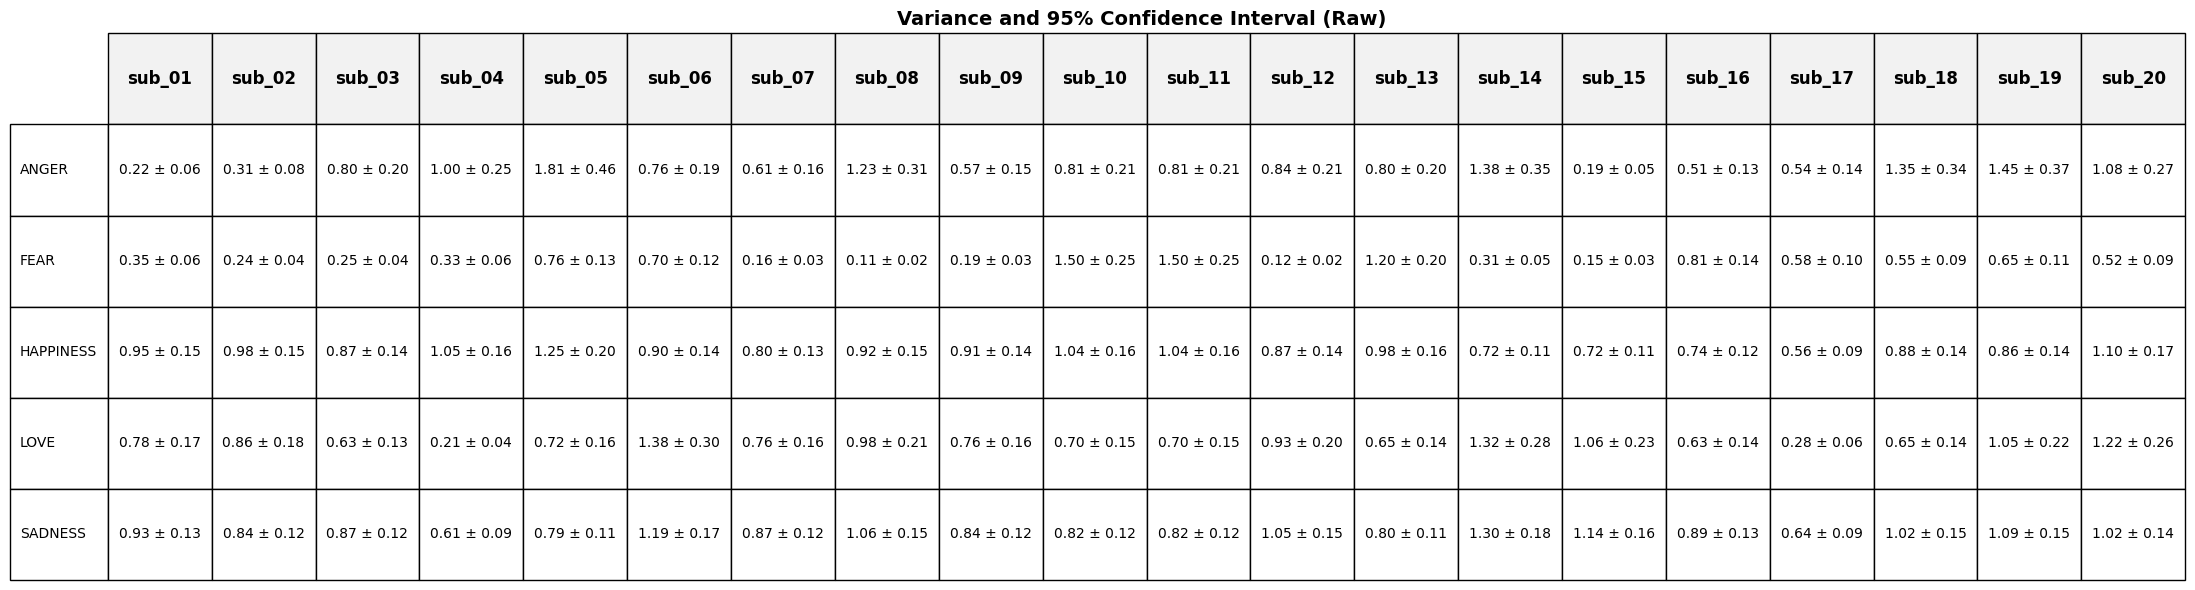

In [11]:
create_table_image(var_ci_raw, title="Variance and 95% Confidence Interval (Raw)")

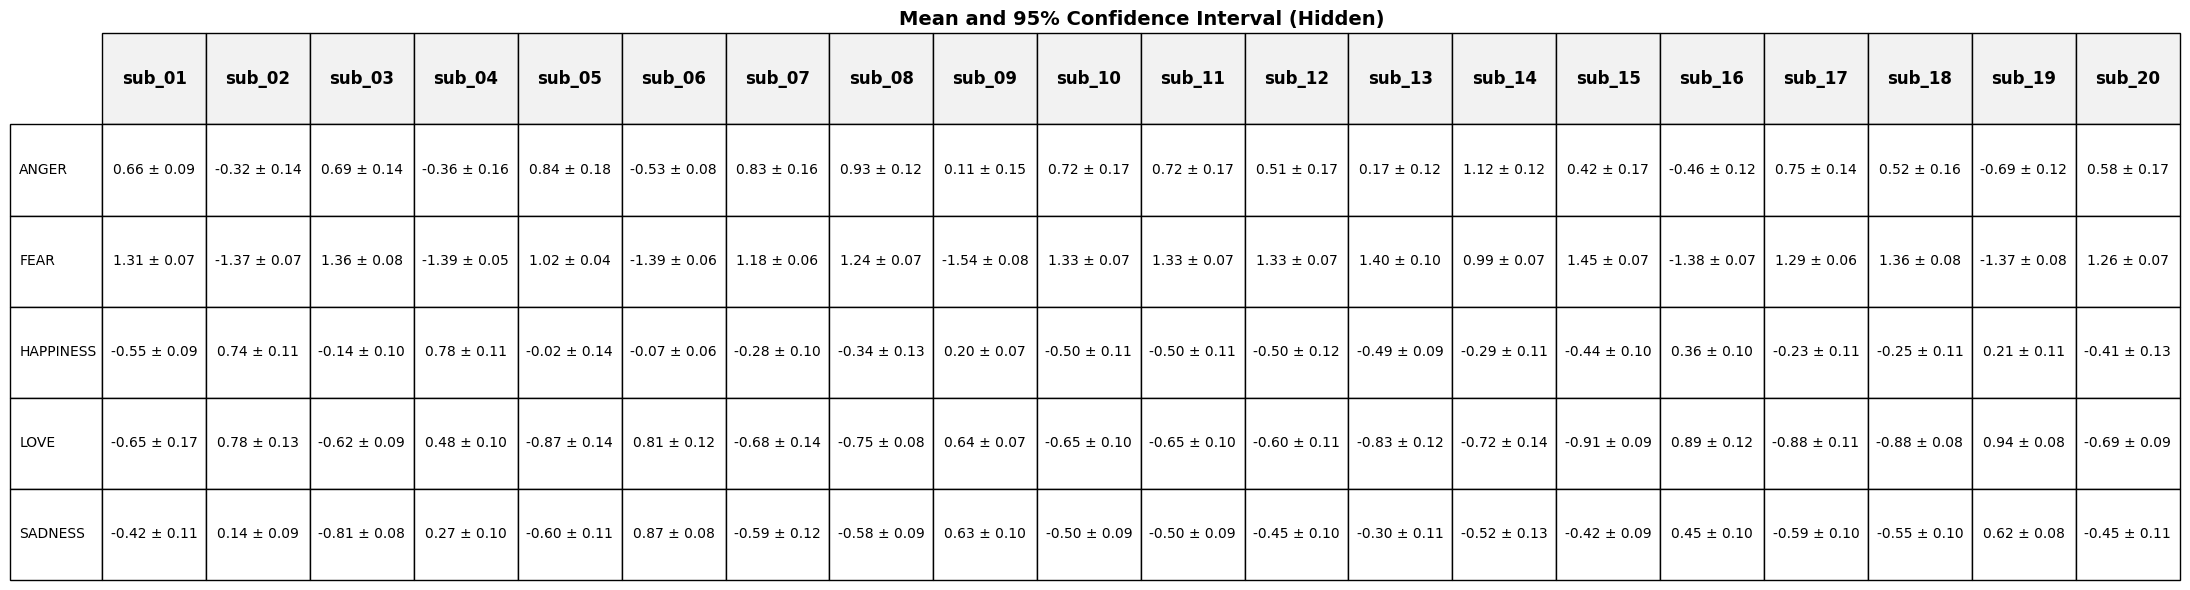

In [12]:
create_table_image(mean_ci_hid, title="Mean and 95% Confidence Interval (Hidden)")

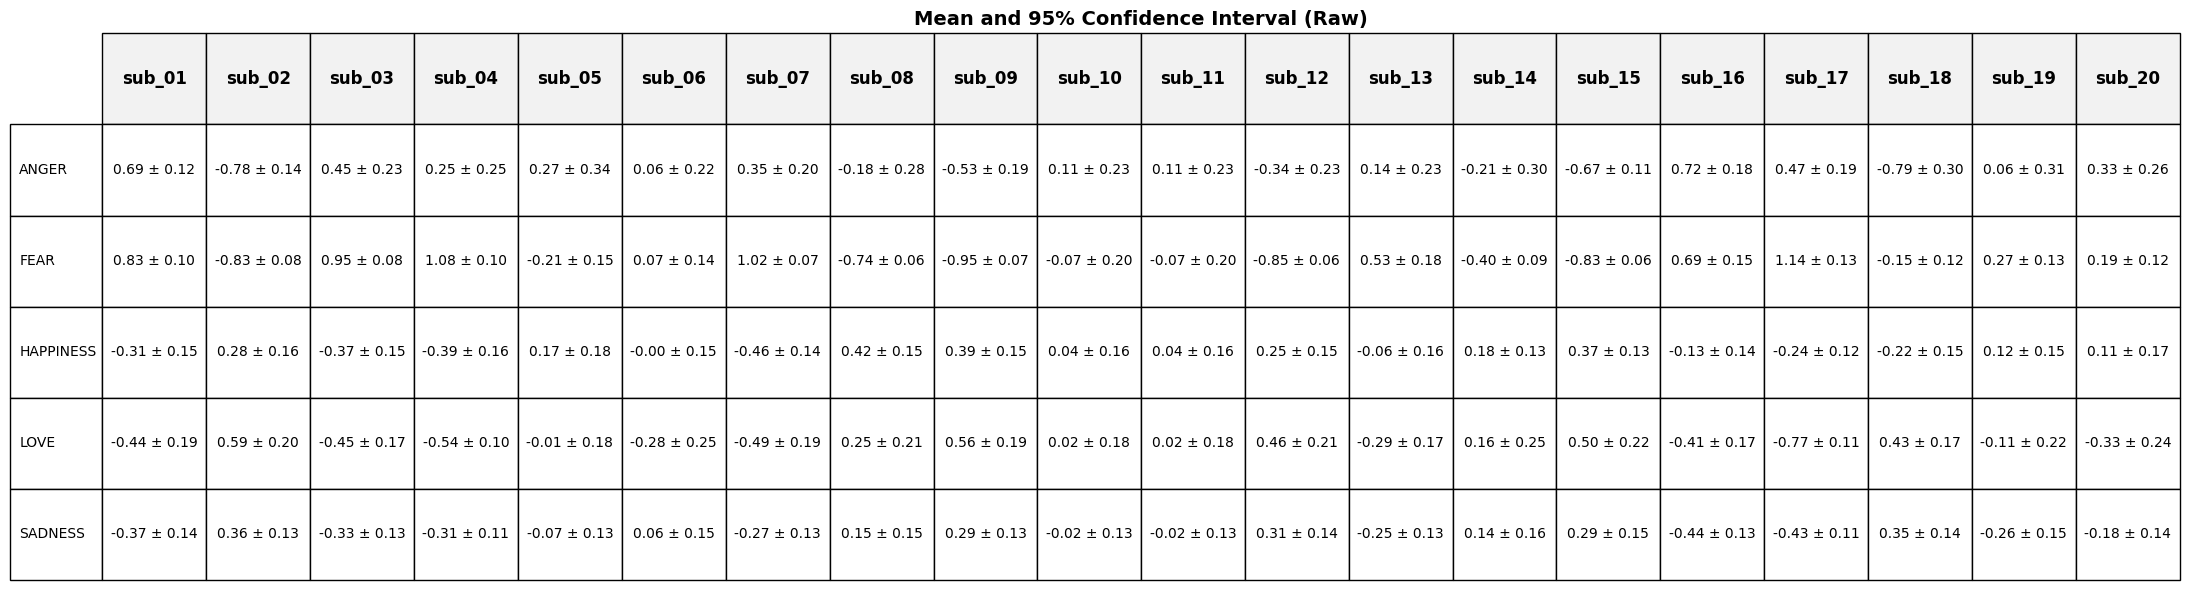

In [13]:
create_table_image(mean_ci_raw, title="Mean and 95% Confidence Interval (Raw)")

### Highlighting Anomalies

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_table_with_anomalies(data, title="Emotion Data Table"):
    df = pd.DataFrame(data)
    
    # Convert values to numerical, removing the ± values
    means = df.applymap(lambda x: float(str(x).split(" ± ")[0]) if isinstance(x, str) and " ± " in x else float(x))
    
    # Compute mean and standard deviation for each emotion
    mean_values = means.mean(axis=1)
    std_values = means.std(axis=1)
    
    # Identify anomalies: values outside 2 standard deviations
    anomalies = means.apply(lambda row: (row < mean_values[row.name] - 2 * std_values[row.name]) | (row > mean_values[row.name] + 2 * std_values[row.name]), axis=1)
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(22, 6))  # Adjust size as needed
    ax.axis('off')  # Remove axes
    
    # Plot the table
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     loc='center',
                     cellLoc='center',
                     colLoc='center',
                     bbox=[0, 0, 1, 1])
    
    # Style the table: adjusting font size and cell widths
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#f2f2f2')  # Light gray for header
        else:
            cell.set_fontsize(10)
            emotion_index = i - 1  # Adjust row index for anomalies DataFrame
            column_index = j - 1  # Adjust column index for anomalies DataFrame
            if column_index >= 0 and anomalies.iloc[emotion_index, column_index]:  # Highlight anomalies in red
                cell.set_facecolor('red')
                cell.set_text_props(color='white', weight='bold')
    
    # Title
    plt.title(title, fontsize=14, weight='bold')
    
    # Save the image
    plt.tight_layout()
    plt.savefig("emotion_data_table_with_anomalies.png", bbox_inches='tight')
    plt.show()

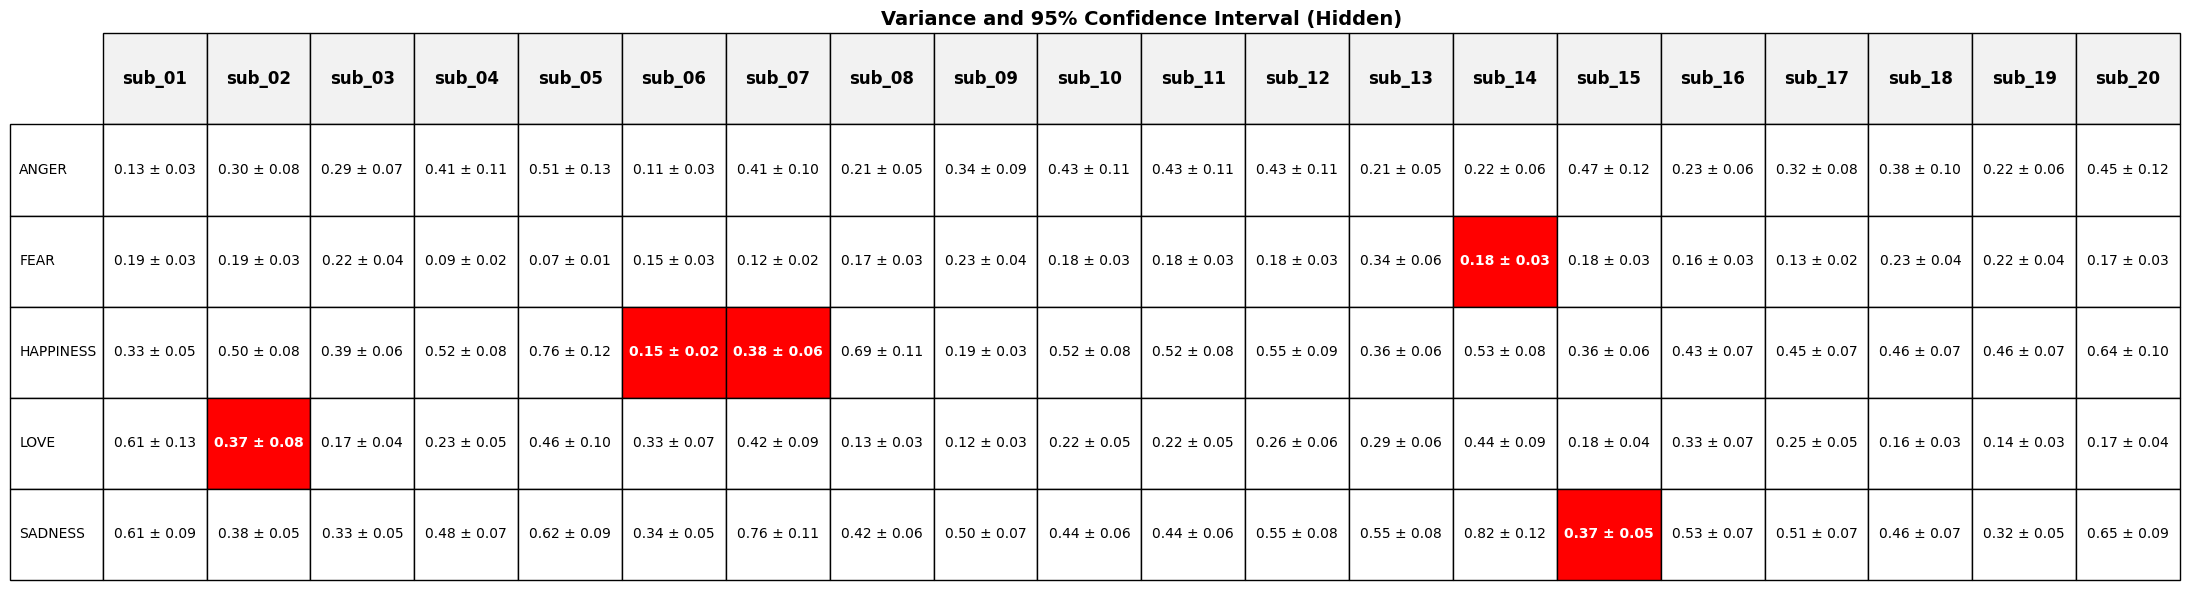

In [21]:
create_table_with_anomalies(var_ci_hid, title="Variance and 95% Confidence Interval (Hidden)")

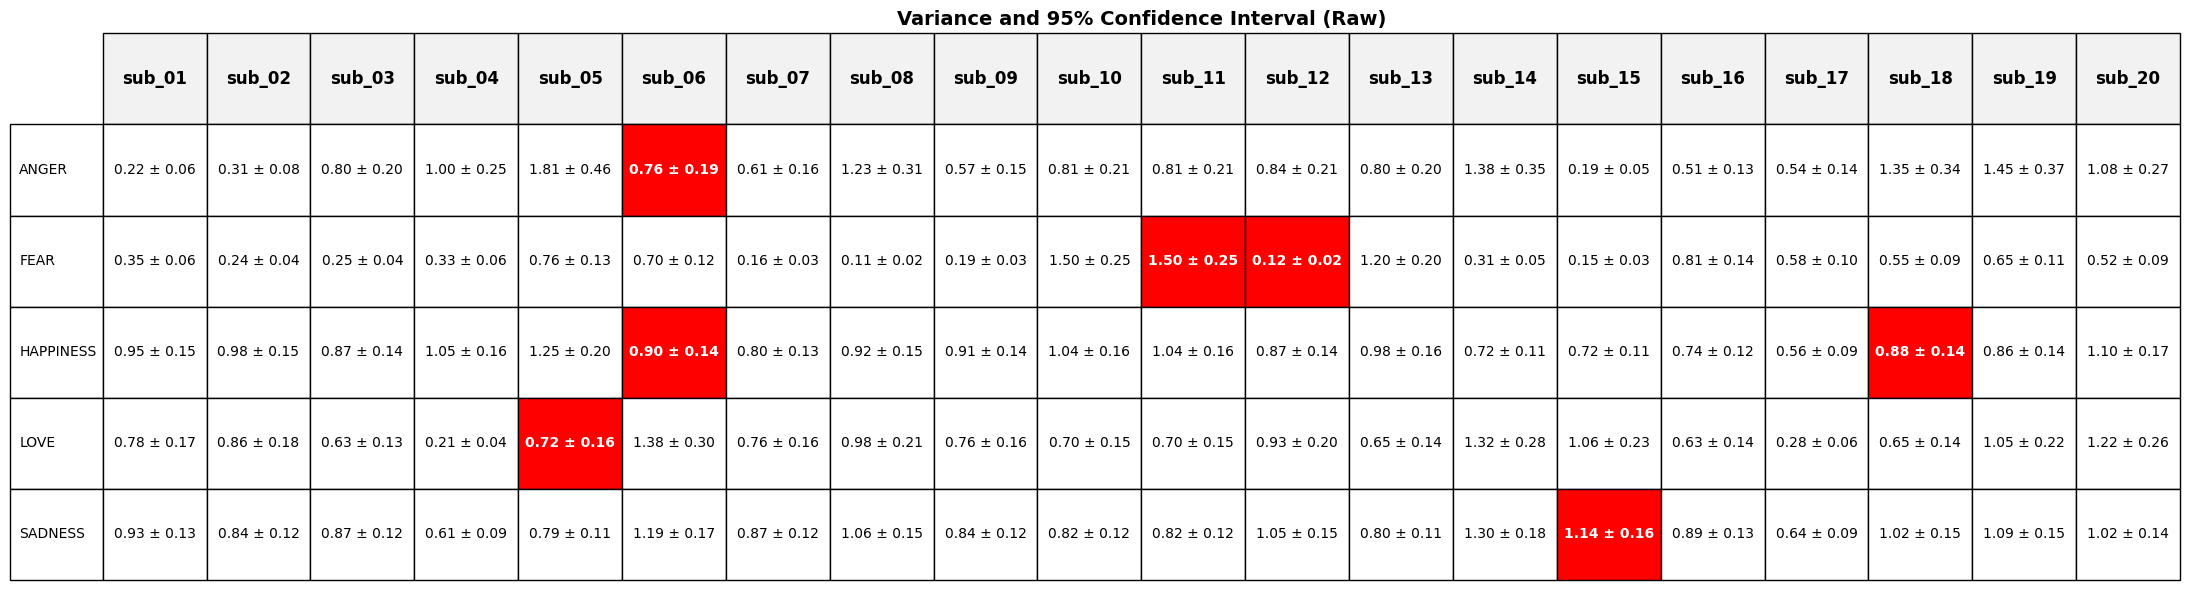

In [22]:
create_table_with_anomalies(var_ci_raw, title="Variance and 95% Confidence Interval (Raw)")

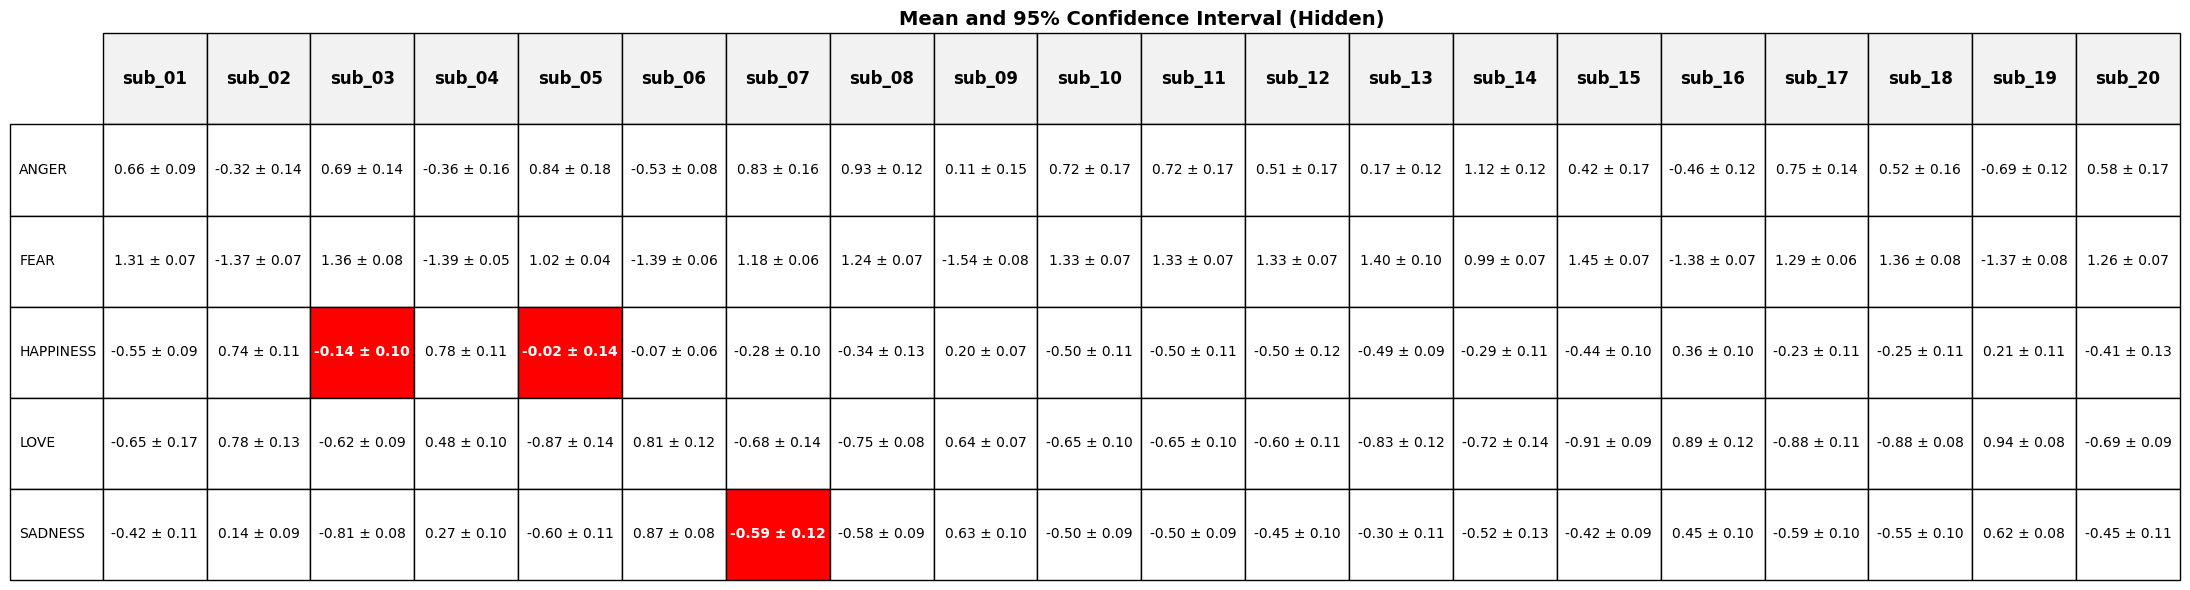

In [23]:
create_table_with_anomalies(mean_ci_hid, title="Mean and 95% Confidence Interval (Hidden)")

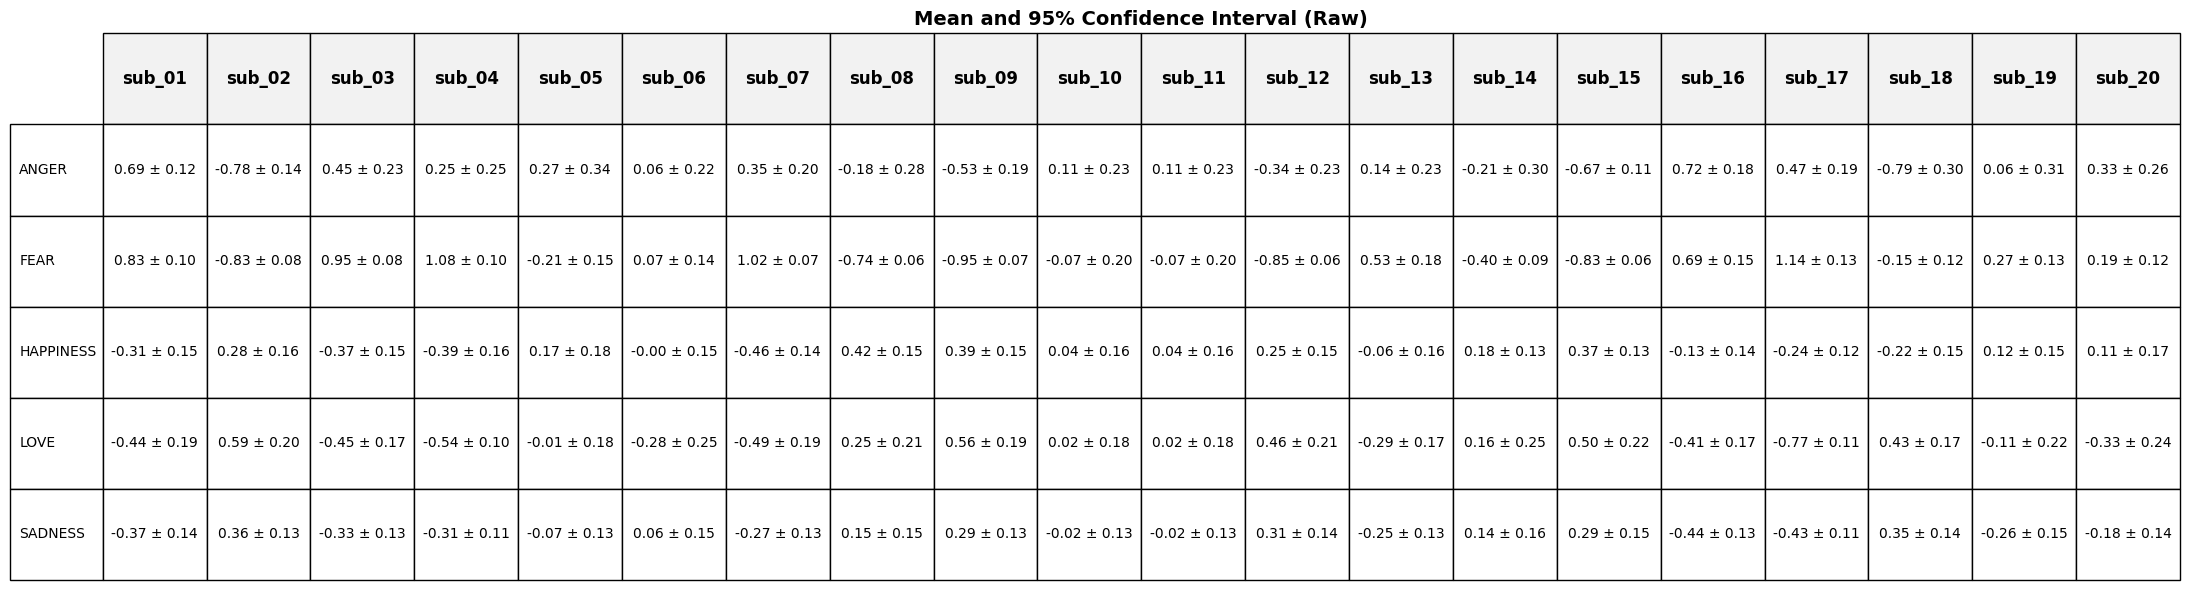

In [24]:
create_table_with_anomalies(mean_ci_raw, title="Mean and 95% Confidence Interval (Raw)")